# Machine Learning and Data Science for Social Good

This notebook is used to present an assignment for a seminar course on bias in machine learning at the University of Salzburg. 

<font color='grey'>By Christina Zorenböhmer | Matriculation number: 12040947</font>




## <font color='cornflowerblue'> Part 1: Context and Dataset </font>

<b>Dataset: Adult Data Set to predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.</b>

<b>Source: </b> The data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions. https://archive.ics.uci.edu/ml/datasets/adult



<b>Case Study: </b>

This prediction of whether or not an individual is likely to earn above or below 50k per year is often used in the context of banking credit evaluation schemes, e.g. to predict credit worthiness. This case study will also be used for an analysis of potential bias here. 


From the outset, there are a few important considerations:
This classifier therefore serves is an <font color='green'>assistive</font> decision-support tool, so we need to consider who serves to gain and lose from the decisions that are made based on these predictions.

In a previous homework, a few scnearios and potential consequences from these predictions were assessed:




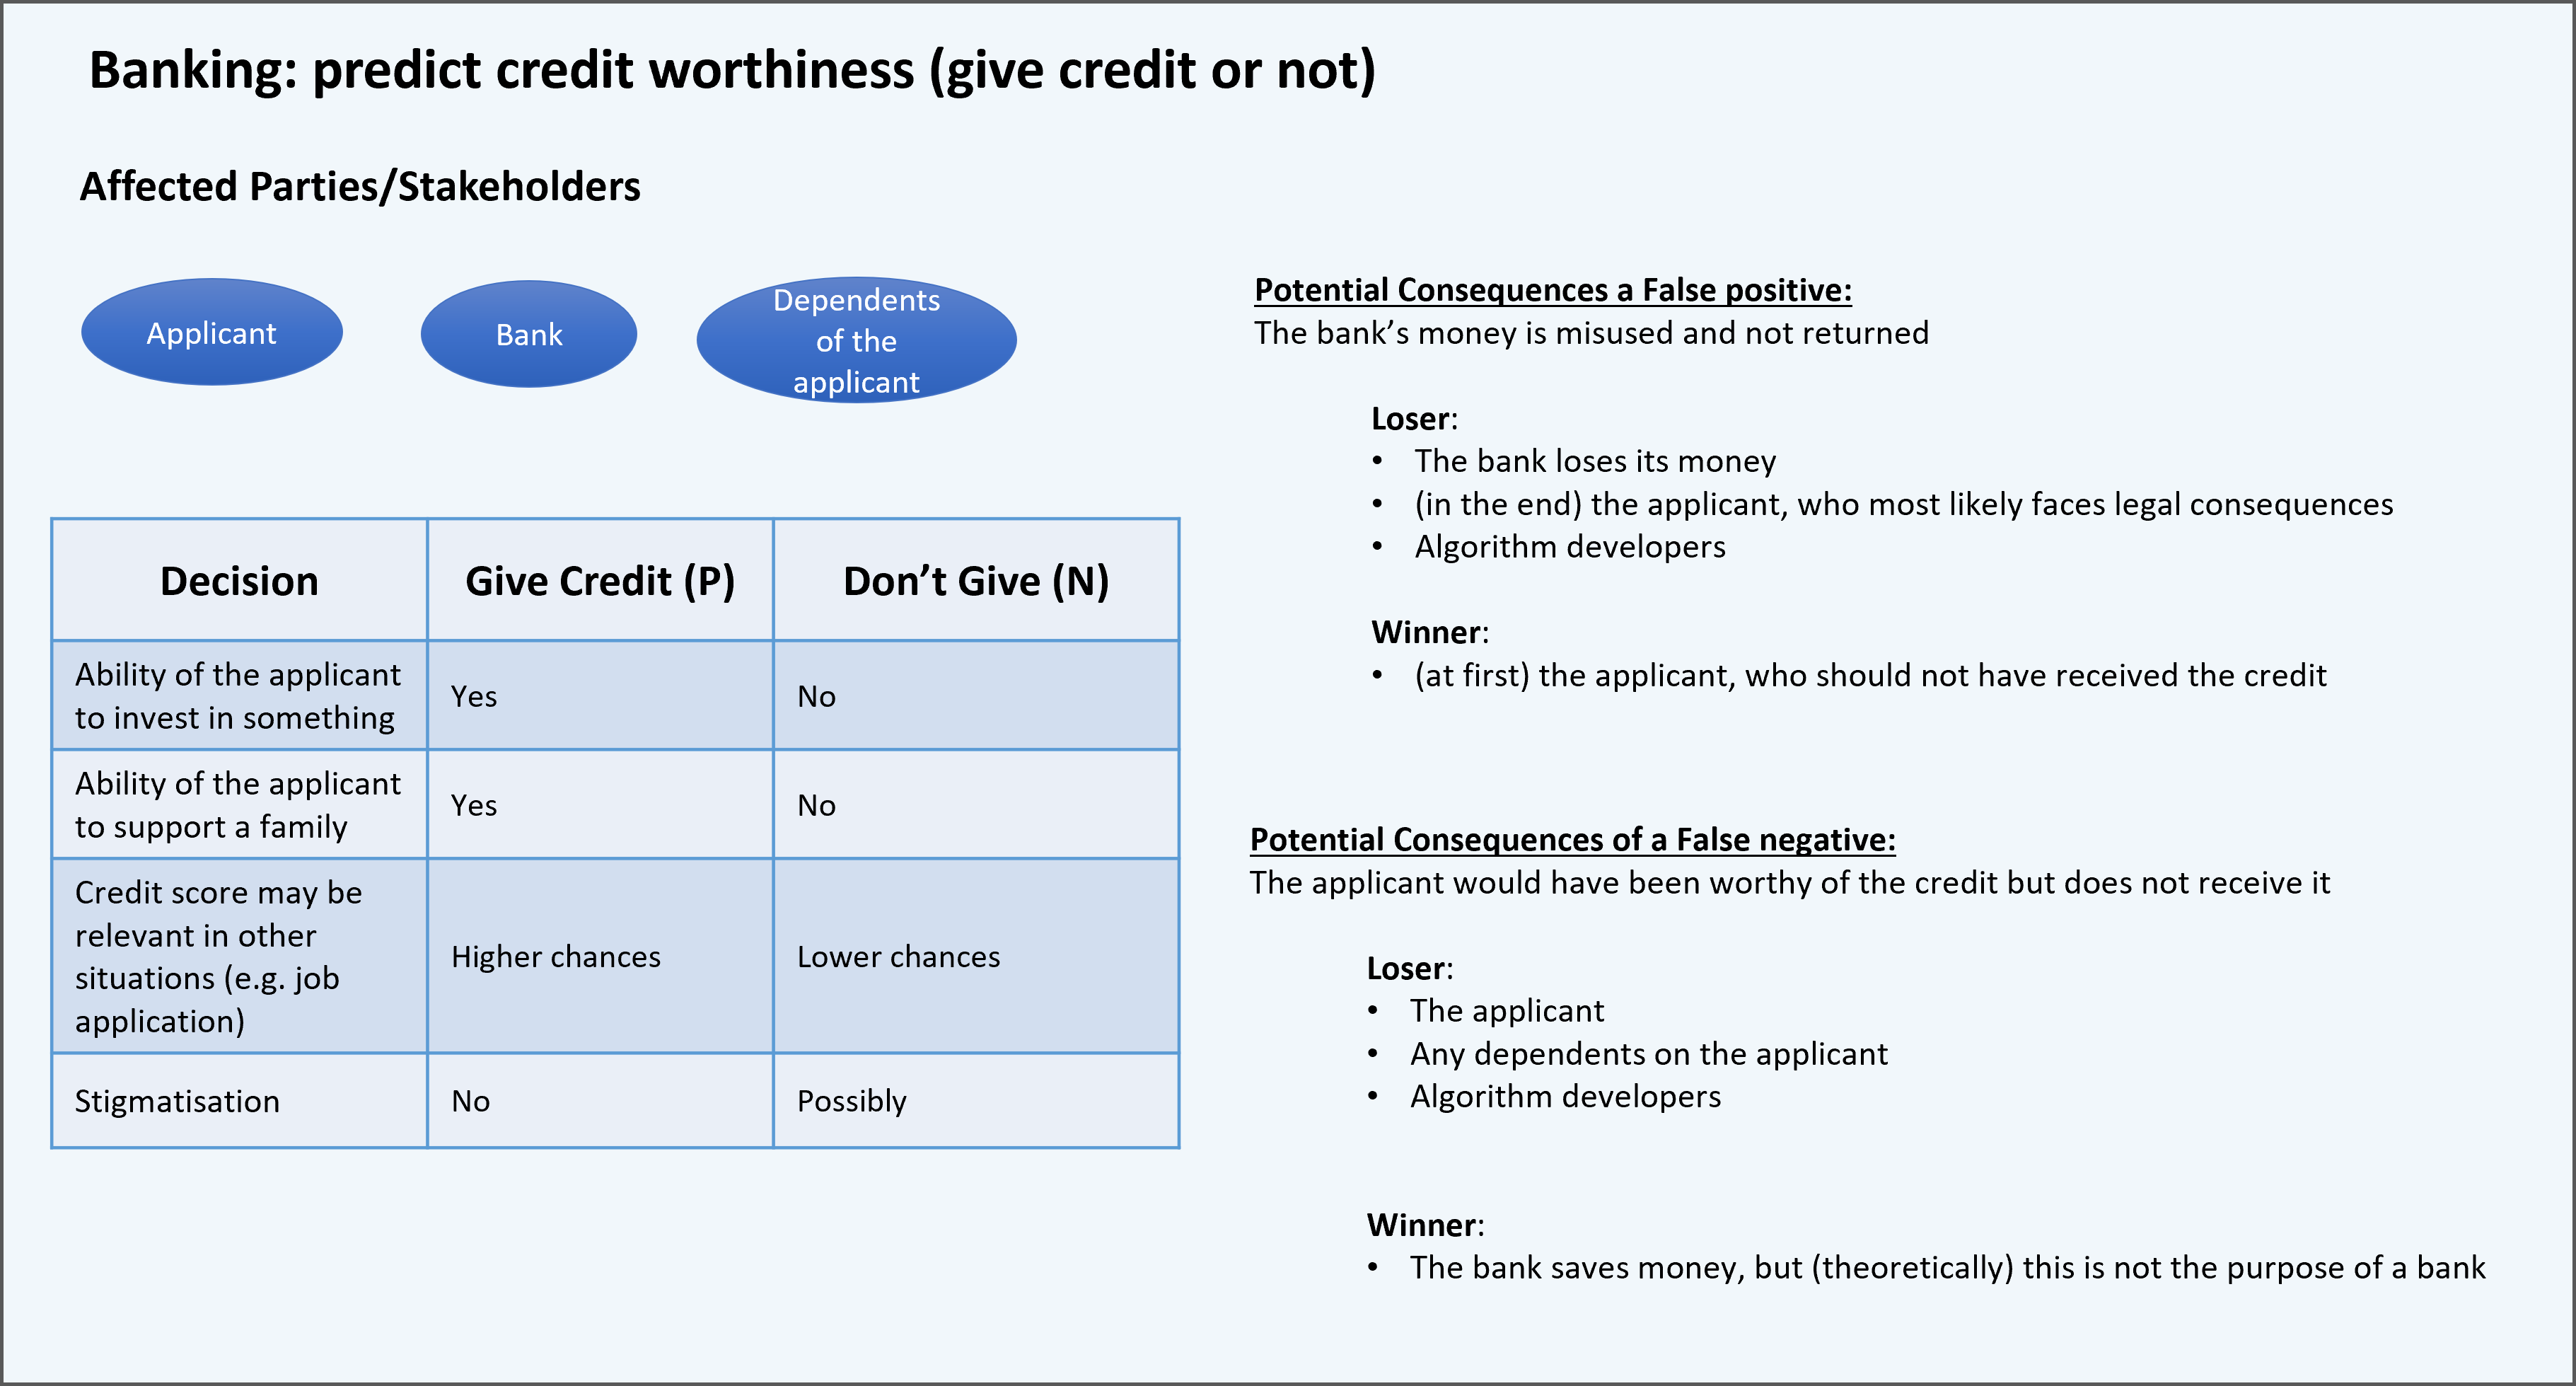

In [14]:
!pip install aequitas
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [15]:
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Check how large the dataset is:

In [59]:
adult_data.shape

(32561, 15)

Add in appropriate headings to the columns:

In [17]:
adult_data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
adult_data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Some exploratory data analysis to 

Text(0.5, 1.0, 'Age Histogram')

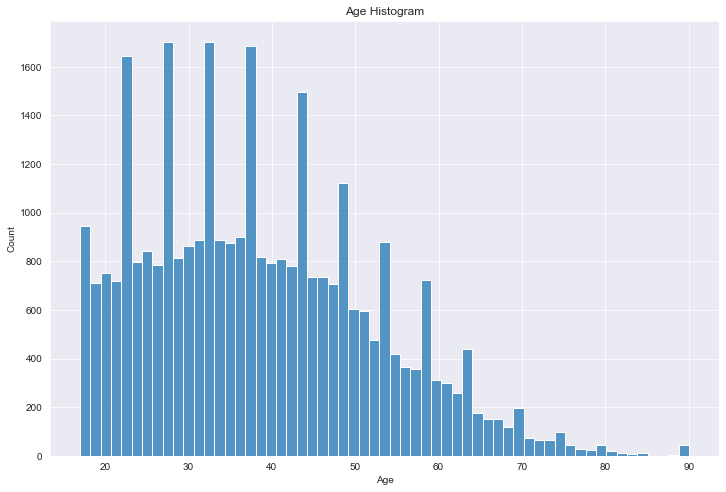

In [93]:
# set figure size:
plt.rcParams['figure.figsize'] = [12, 8]

sns.set_style('darkgrid')
sns.histplot(adult_data.Age).set_title("Age Histogram")

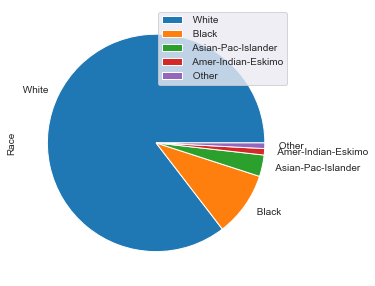

In [94]:
x = pd.DataFrame(adult_data["Race"].value_counts())

plot = x.plot.pie(y="Race", figsize=(5,5))

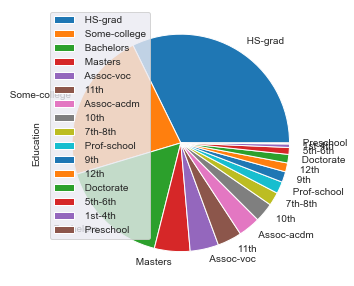

In [95]:
x = pd.DataFrame(adult_data["Education"].value_counts())

plot = x.plot.pie(y="Education", figsize=(5,5))

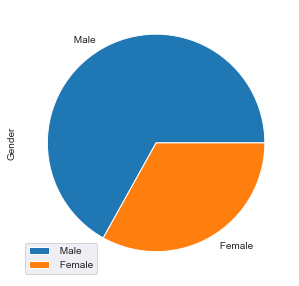

In [96]:
x = pd.DataFrame(adult_data["Gender"].value_counts())

plot = x.plot.pie(y="Gender", figsize=(5,5))

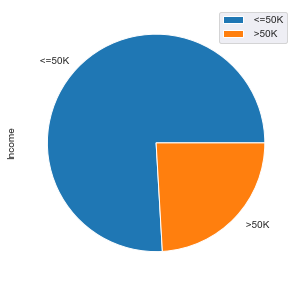

In [97]:
x = pd.DataFrame(adult_data["Income"].value_counts())

plot = x.plot.pie(y="Income", figsize=(5,5))

## <font color='cornflowerblue'>  Part 2: Machine Learning Classification </font>

- the dataset was classified via Rapidminer Go
   - more emphasis was placed on the accuracy of the ">50k" category with the reasoning that a false negatives and false postives in this catgory would be worse than false predictions in the "<=50k" category
 
   - three classifiers were compared for accuracy: neural networks (deep learning), random forest, and gradient boosted trees
   
   - confusion matrix and initial conclusions
   

## <font color='cornflowerblue'>  Part 3: Aequitas Bias Audit </font>

<b>Data Preparation: </b> 

1. The machine learning classification results were added to the original dataset
2. The column labels were adjusted to match the requirements of Aequitas, i.e. the ground truth column (= income) was labelled "Label_value" and the predictions were labelled as "Score"
3. The label_value column entries were adjusted 

- accuracy and other indicators (confusion matrix)

- bias inspection

In [156]:
prediction_data = pd.read_csv("https://cfd1e30b-0883-46cc-aa24-b895a089c3b2.filesusr.com/ugd/fba136_b80e8ff12b684ade8ec816084c90f42a.csv?dn=prediction_result_adjusted2.csv")
prediction_data.head()

,fnlwgt,captial-gain,capital-loss,Label_value,confidence(<=50K),confidence(>50K),Score,cost,Support Prediction,Contradict Prediction,...,Education,marital-status,occupation,relationship,race,gender,native-country,age,Education-num,hours-per-week
0,77516,2174,0,<=50K,0.864586,0.135414,<=50K,0.729172,relationship = Not-in-family (0.223); marital-...,age = 39 (-0.339); Education = Bachelors (-0.3...,...,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,39,13,40
1,83311,0,0,<=50K,0.640588,0.359412,<=50K,0.281177,gender = Male (0.056),relationship = Husband (-0.351); Education = B...,...,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,50,13,13
2,215646,0,0,<=50K,0.935112,0.064888,<=50K,0.870225,Education = HS-grad (0.222); relationship = No...,age = 38 (-0.359); Education-num = 9 (-0.195);...,...,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,38,9,40
3,234721,0,0,<=50K,0.916137,0.083863,<=50K,0.832275,Education = 11th (0.183); race = Black (0.137)...,relationship = Husband (-0.386); marital-statu...,...,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,53,7,40
4,338409,0,0,<=50K,0.501770,0.498230,<=50K,0.003540,race = Black (0.117); relationship = Wife (0.0...,age = 28 (-0.433); Education = Bachelors (-0.2...,...,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,28,13,40


In [157]:
prediction_data.shape

(32561, 21)

### Exploring Predictions Vs. Ground Truth

General Settings for data display:

In [158]:
# colors:
aq_palette = sns.diverging_palette(225, 35, n=2)
# figure size:
plt.rcParams['figure.figsize'] = [12, 8]

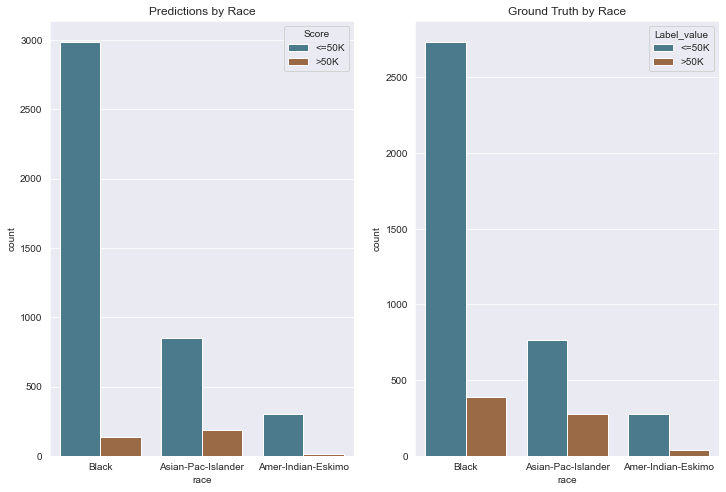

In [159]:
# to see the results for predictions according to race: 
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

pred_by_race = sns.countplot(x="race", hue="Score", data=prediction_data[prediction_data.race.isin(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Black'])], palette=aq_palette, ax=ax[0]).set_title('Predictions by Race')

truth_by_race = sns.countplot(x="race", hue="Label_value", data=prediction_data[prediction_data.race.isin(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Black'])], palette=aq_palette, ax=ax[1]).set_title('Ground Truth by Race')

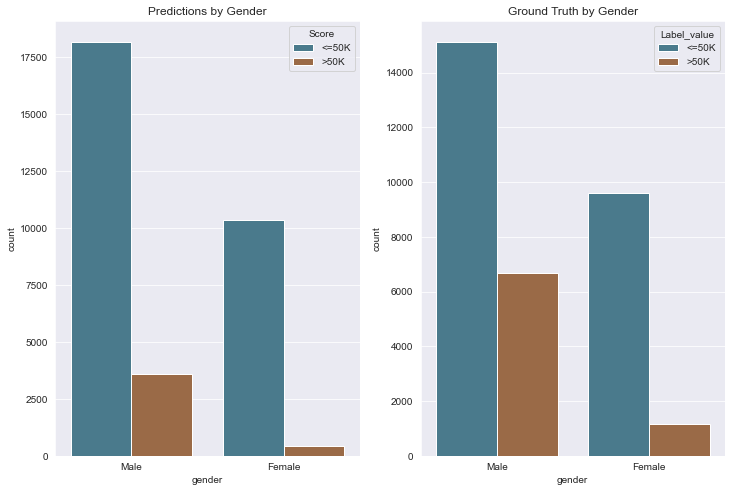

In [160]:
# to see the results for predictions according to gender: 

fig, ax = plt.subplots(1,2)

pred_by_race = sns.countplot(x="gender", hue="Score", data=prediction_data[prediction_data.gender.isin(['Female', 'Male'])], palette=aq_palette, ax=ax[0]).set_title('Predictions by Gender')

truth_by_race = sns.countplot(x="gender", hue="Label_value", data=prediction_data[prediction_data.gender.isin(['Female', 'Male'])], palette=aq_palette, ax=ax[1]).set_title('Ground Truth by Gender')

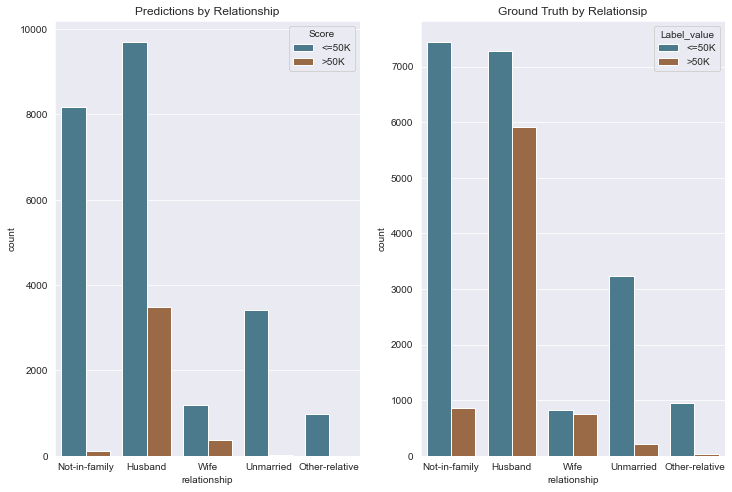

In [161]:
# to see results of prediction for marital status 
#Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

# to see the results for predictions according to gender: 

fig, ax = plt.subplots(1,2)

pred_by_race = sns.countplot(x="relationship", hue="Score", data=prediction_data[prediction_data.relationship.isin(['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])], palette=aq_palette, ax=ax[0]).set_title('Predictions by Relationship')

truth_by_race = sns.countplot(x="relationship", hue="Label_value", data=prediction_data[prediction_data.relationship.isin(['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])], palette=aq_palette, ax=ax[1]).set_title('Ground Truth by Relationsip')

### Aequitas Classes

The aequitas tool consideres three broad steps as python classes when checking for unfairness and bias:

- Group(): Define groups

- Bias(): Calculate disparities

- Fairness(): Assert fairness

This step required some additionl data pre-processing. In particular, the "Score" and "Label_value" column headers had to be changed to lowercase, and the data values changed into binary data types.

In [162]:
# rename headings
prediction_data_new = prediction_data.rename(columns={'Score': 'score', 'Label_value': 'label_value'})
prediction_data_new.head()

,fnlwgt,captial-gain,capital-loss,label_value,confidence(<=50K),confidence(>50K),score,cost,Support Prediction,Contradict Prediction,...,Education,marital-status,occupation,relationship,race,gender,native-country,age,Education-num,hours-per-week
0,77516,2174,0,<=50K,0.864586,0.135414,<=50K,0.729172,relationship = Not-in-family (0.223); marital-...,age = 39 (-0.339); Education = Bachelors (-0.3...,...,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,39,13,40
1,83311,0,0,<=50K,0.640588,0.359412,<=50K,0.281177,gender = Male (0.056),relationship = Husband (-0.351); Education = B...,...,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,50,13,13
2,215646,0,0,<=50K,0.935112,0.064888,<=50K,0.870225,Education = HS-grad (0.222); relationship = No...,age = 38 (-0.359); Education-num = 9 (-0.195);...,...,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,38,9,40
3,234721,0,0,<=50K,0.916137,0.083863,<=50K,0.832275,Education = 11th (0.183); race = Black (0.137)...,relationship = Husband (-0.386); marital-statu...,...,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,53,7,40
4,338409,0,0,<=50K,0.501770,0.498230,<=50K,0.003540,race = Black (0.117); relationship = Wife (0.0...,age = 28 (-0.433); Education = Bachelors (-0.2...,...,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,28,13,40


In [163]:
# turn score and label_value into binary datasets
prediction_data_new["label_value"] = prediction_data_new["label_value"].map({ "<=50K": 0, ">50K": 1 })
prediction_data_new["score"] = prediction_data_new["score"].map({ "<=50K": 0, ">50K": 1 })
prediction_data_new.head()


,fnlwgt,captial-gain,capital-loss,label_value,confidence(<=50K),confidence(>50K),score,cost,Support Prediction,Contradict Prediction,...,Education,marital-status,occupation,relationship,race,gender,native-country,age,Education-num,hours-per-week
0,77516,2174,0,0,0.864586,0.135414,0,0.729172,relationship = Not-in-family (0.223); marital-...,age = 39 (-0.339); Education = Bachelors (-0.3...,...,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,39,13,40
1,83311,0,0,0,0.640588,0.359412,0,0.281177,gender = Male (0.056),relationship = Husband (-0.351); Education = B...,...,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,50,13,13
2,215646,0,0,0,0.935112,0.064888,0,0.870225,Education = HS-grad (0.222); relationship = No...,age = 38 (-0.359); Education-num = 9 (-0.195);...,...,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,38,9,40
3,234721,0,0,0,0.916137,0.083863,0,0.832275,Education = 11th (0.183); race = Black (0.137)...,relationship = Husband (-0.386); marital-statu...,...,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,53,7,40
4,338409,0,0,0,0.501770,0.498230,0,0.003540,race = Black (0.117); relationship = Wife (0.0...,age = 28 (-0.433); Education = Bachelors (-0.2...,...,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,28,13,40


In [176]:
#df = pd.DataFrame(data, columns = ['Name', 'Age'])

prediction_format = pd.DataFrame()
# prediction_format = prediction_data_new[['score', 'label_value', 'gender', 'race', 'relationship', 'Education', 'occupation', 'marital-status']]
prediction_format = prediction_data_new[['score', 'label_value', 'gender', 'race', 'relationship']]
prediction_format.head()


,score,label_value,gender,race,relationship
0,0,0,Male,White,Not-in-family
1,0,0,Male,White,Husband
2,0,0,Male,White,Not-in-family
3,0,0,Male,Black,Husband
4,0,0,Female,Black,Wife


<b>Aequitas Group() Class</b>

In [177]:
g = Group()
xtab, _ = g.get_crosstabs(prediction_format)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [178]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [179]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,4011,gender,Female,409,10362,98,868,9494,311,1179,9592,10771,32561
1,0,binary 0/1,4011,gender,Male,3602,18188,760,3820,14368,2842,6662,15128,21790,32561
2,0,binary 0/1,4011,race,Amer-Indian-Eskimo,12,299,2,26,273,10,36,275,311,32561
3,0,binary 0/1,4011,race,Asian-Pac-Islander,188,851,54,142,709,134,276,763,1039,32561
4,0,binary 0/1,4011,race,Black,135,2989,34,286,2703,101,387,2737,3124,32561
5,0,binary 0/1,4011,race,Other,10,261,3,18,243,7,25,246,271,32561
6,0,binary 0/1,4011,race,White,3666,24150,765,4216,19934,2901,7117,20699,27816,32561
7,0,binary 0/1,4011,relationship,Husband,3490,9703,732,3160,6543,2758,5918,7275,13193,32561
8,0,binary 0/1,4011,relationship,MISSING,1,5067,0,66,5001,1,67,5001,5068,32561
9,0,binary 0/1,4011,relationship,Not-in-family,122,8183,32,766,7417,90,856,7449,8305,32561


Below the ratios:

In [180]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,gender,Female,0.26,0.99,0.08,0.24,0.01,0.74,0.92,0.76,0.10,0.04,0.11
1,gender,Male,0.43,0.95,0.21,0.21,0.05,0.57,0.79,0.79,0.90,0.17,0.31
2,race,Amer-Indian-Eskimo,0.28,0.99,0.09,0.17,0.01,0.72,0.91,0.83,0.00,0.04,0.12
3,race,Asian-Pac-Islander,0.49,0.93,0.17,0.29,0.07,0.51,0.83,0.71,0.05,0.18,0.27
4,race,Black,0.26,0.99,0.10,0.25,0.01,0.74,0.90,0.75,0.03,0.04,0.12
5,race,Other,0.28,0.99,0.07,0.30,0.01,0.72,0.93,0.70,0.00,0.04,0.09
6,race,White,0.41,0.96,0.17,0.21,0.04,0.59,0.83,0.79,0.91,0.13,0.26
7,relationship,Husband,0.47,0.90,0.33,0.21,0.10,0.53,0.67,0.79,0.87,0.26,0.45
8,relationship,MISSING,0.01,1.00,0.01,0.00,0.00,0.99,0.99,1.00,0.00,0.00,0.01
9,relationship,Not-in-family,0.11,1.00,0.09,0.26,0.00,0.89,0.91,0.74,0.03,0.01,0.10


... now that we have the ratios 

Fairness Tree

Based on fairness tree - FNR (people with need) is most important. 

Based on general considerations of the case study, also the recall/sensitivity (TPR) rate i.e. sensitivity is important (how much of the true positives did you actually capture - since we argue that its more important to capture all true positives than to ....  

Results shows unfair recall values for men and women

Asian pacific, whites have higher recall values (TPR)

<b>Aequitas Bias() Class </b>

In [181]:
b = Bias()

In [183]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=prediction_format, 
                                        ref_groups_dict={'gender' : 'Male', 'race':'White', 'relationship' : 'Husband'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,4011,gender,Female,0.263783,0.989783,0.083768,0.239609,0.010217,0.736217,0.916232,0.760391,409,10362,0.101970,0.037972,98,868,9494,311,1179,9592,10771,32561,0.109461,True,True,1.135620,Male,False,1.283947,Male,True,0.398839,Male,True,0.203369,Male,False,1.159830,Male,True,0.113548,Male,True,0.229710,Male,True,0.963733,Male,False,1.042138,Male,False,0.618340,Male,True
1,0,binary 0/1,4011,gender,Male,0.426599,0.949762,0.210029,0.210994,0.050238,0.573401,0.789971,0.789006,3602,18188,0.898030,0.165305,760,3820,14368,2842,6662,15128,21790,32561,0.305737,False,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False
2,0,binary 0/1,4011,race,Amer-Indian-Eskimo,0.277778,0.992727,0.086957,0.166667,0.007273,0.722222,0.913043,0.833333,12,299,0.002992,0.038585,2,26,273,10,36,275,311,32561,0.115756,True,True,0.798693,White,False,1.219178,White,True,0.498102,White,True,0.196782,White,False,1.106150,White,True,0.003273,White,True,0.292768,White,True,1.053085,White,False,1.030825,White,False,0.681470,White,True
3,0,binary 0/1,4011,race,Asian-Pac-Islander,0.485507,0.929227,0.166863,0.287234,0.070773,0.514493,0.833137,0.712766,188,851,0.046871,0.180943,54,142,709,134,276,763,1039,32561,0.265640,False,True,1.376471,White,True,0.868512,White,False,0.955818,White,False,1.914949,White,True,1.009344,White,False,0.051282,White,True,1.372918,White,True,0.900724,White,True,0.964887,White,True,1.191091,White,False
4,0,binary 0/1,4011,race,Black,0.260982,0.987578,0.095684,0.251852,0.012422,0.739018,0.904316,0.748148,135,2989,0.033657,0.043214,34,286,2703,101,387,2737,3124,32561,0.123880,True,True,1.206914,White,False,1.247531,White,True,0.548096,White,True,0.336118,White,False,1.095577,White,True,0.036825,White,True,0.327888,White,True,0.945436,White,False,1.025478,White,False,0.640265,White,True
5,0,binary 0/1,4011,race,Other,0.280000,0.987805,0.068966,0.300000,0.012195,0.720000,0.931034,0.700000,10,261,0.002493,0.036900,3,18,243,7,25,246,271,32561,0.092251,True,True,1.437647,White,False,1.215427,White,True,0.395047,White,True,0.329970,White,False,1.127946,White,True,0.002728,White,True,0.279984,White,True,0.884592,White,False,1.025714,White,False,0.686922,White,True
6,0,binary 0/1,4011,race,White,0.407616,0.963042,0.174576,0.208674,0.036958,0.592384,0.825424,0.791326,3666,24150,0.913987,0.131795,765,4216,19934,2901,7117,20699,27816,32561,0.255860,False,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False,1.000000,White,False
7,0,binary 0/1,4011,relationship,Husband,0.466036,0.899381,0.325672,0.209742,0.100619,0.533964,0.674328,0.790258,3490,9703,0.870107,0.264534,732,3160,6543,2758,5918,7275,13193,32561,0.448571,False,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False,1.000000,Husband,False
8,0,binary 0/1,4011,relationship,MISSING,0.014925,1.

In [184]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,gender,Female,1.135620,1.283947,0.398839,0.203369,1.159830,0.113548,0.229710,0.963733,1.042138,0.618340,True,True,False,True,True,False,True,True,True,False,False,True
1,gender,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
2,race,Amer-Indian-Eskimo,0.798693,1.219178,0.498102,0.196782,1.106150,0.003273,0.292768,1.053085,1.030825,0.681470,True,True,False,True,True,False,True,True,True,False,False,True
3,race,Asian-Pac-Islander,1.376471,0.868512,0.955818,1.914949,1.009344,0.051282,1.372918,0.900724,0.964887,1.191091,False,True,True,False,False,True,False,True,True,True,True,False
4,race,Black,1.206914,1.247531,0.548096,0.336118,1.095577,0.036825,0.327888,0.945436,1.025478,0.640265,True,True,False,True,True,False,True,True,True,False,False,True
5,race,Other,1.437647,1.215427,0.395047,0.329970,1.127946,0.002728,0.279984,0.884592,1.025714,0.686922,True,True,False,True,True,False,True,True,True,False,False,True
6,race,White,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
7,relationship,Husband,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
8,relationship,MISSING,0.000000,1.844833,0.039996,0.000000,1.463643,0.000287,0.000746,1.265410,1.111875,0.032026,True,True,None,True,True,None,True,True,True,None,None,True
9,relationship,Not-in-family,1.250560,1.675880,0.287432,0.042695,1.344141,0.034957,0.055531,0.933499,1.107099,0.225605,True,True,False,True,True,False,True,True,True,False,False,True


In [185]:
metrics = ['fnr','tpr']
disparity_tolerance = 1.25

Aequitas Visualisations:

In [186]:
ap.summary(bdf, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

<b>Gender</b>

Check for disparities in Gender:

In [187]:
ap.disparity(bdf, metrics, 'gender', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

Check how the fairness threshold maps to the absolute values of each metric

In [188]:
ap.absolute(bdf, metrics, 'gender', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

<b>Race</b>

Check for disparities in Race:

In [189]:
ap.disparity(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [190]:
ap.absolute(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

<b>Relationship</b>

Check for disparities in relationship:

In [191]:
ap.disparity(bdf, metrics, 'relationship', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [192]:
ap.absolute(bdf, metrics, 'relationship', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

NOTE - I skipped some bits where the same analysis was done for other groups

Visualising Disparities: (Fairness)

In [193]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [194]:
parity_detrminations = f.list_parities(fdf)

In [195]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,Statistical Parity,FOR Parity,NPV Parity,FNR Parity,TNR Parity,TypeI Parity,FPR Parity,Supervised Fairness,FDR Parity,Precision Parity,TypeII Parity,Impact Parity,Equalized Odds,Unsupervised Fairness,TPR Parity
0,gender,Female,0.263783,0.989783,0.083768,0.239609,0.010217,0.736217,0.916232,0.760391,0.101970,0.037972,0.109461,1.135620,1.283947,0.398839,0.203369,1.159830,0.113548,0.229710,0.963733,1.042138,0.618340,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False
1,gender,Male,0.426599,0.949762,0.210029,0.210994,0.050238,0.573401,0.789971,0.789006,0.898030,0.165305,0.305737,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,race,Amer-Indian-Eskimo,0.277778,0.992727,0.086957,0.166667,0.007273,0.722222,0.913043,0.833333,0.002992,0.038585,0.115756,0.798693,1.219178,0.498102,0.196782,1.106150,0.003273,0.292768,1.053085,1.030825,0.681470,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False
3,race,Asian-Pac-Islander,0.485507,0.929227,0.166863,0.287234,0.070773,0.514493,0.833137,0.712766,0.046871,0.180943,0.265640,1.376471,0.868512,0.955818,1.914949,1.009344,0.051282,1.372918,0.900724,0.964887,1.191091,False,True,True,True,True,False,False,False,False,True,True,False,False,False,True
4,race,Black,0.260982,0.987578,0.095684,0.251852,0.012422,0.739018,0.904316,0.748148,0.033657,0.043214,0.123880,1.206914,1.247531,0.548096,0.336118,1.095577,0.036825,0.327888,0.945436,1.025478,0.640265,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False
5,race,Other,0.280000,0.987805,0.068966,0.300000,0.012195,0.720000,0.931034,0.700000,0.002493,0.036900,0.092251,1.437647,1.215427,0.395047,0.329970,1.127946,0.002728,0.279984,0.884592,1.025714,0.686922,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False
6,race,White,0.407616,0.963042,0.174576,0.208674,0.036958,0.592384,0.825424,0.791326,0.913987,0.131795,0.255860,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,relationship,Husband,0.466036,0.899381,0.325672,0.209742,0.100619,0.533964,0.674328,0.790258,0.870107,0.264534,0.448571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,relationship,MISSING,0.014925,1.000000,0.013025,0.000000,0.000000,0.985075,0.986975,1.000000,0.000249,0.000197,0.013220,0.000000,1.844833,0.039996,0.000000,1.463643,0.000287,0.000746,1.265410,1.111875,0.032026,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9,relationship,Not-in-family,0.105140,0.995704,0.093609,0.262295,0.004296,0.894860,0.906391,0.737705,0.030416,0.014690,0.103070,1.250560,1.675880,0.287432,0.042695,1.344141,0.034957,0.055531,0.933499,1.107099,0.225605,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False


How to interpret Disparities

In [196]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,gender,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
1,0,binary 0/1,race,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False
2,0,binary 0/1,relationship,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [197]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

## <font color='cornflowerblue'>  Part 4: Interpretation and Recommendations for Bias Reduction </font>